In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.tsa.stattools as tools
import re
import statsmodels.api as sm
rawData = pd.read_csv('data/data.scv', sep='\t')
rawData.time = pd.to_datetime(rawData.time)
rawData = rawData.set_index(rawData.time)
rawData = rawData.drop(['time'],axis=1)

In [2]:
data = rawData['2000':'2003'].copy()

In [3]:
# %matplotlib notebook

<AxesSubplot: xlabel='time'>

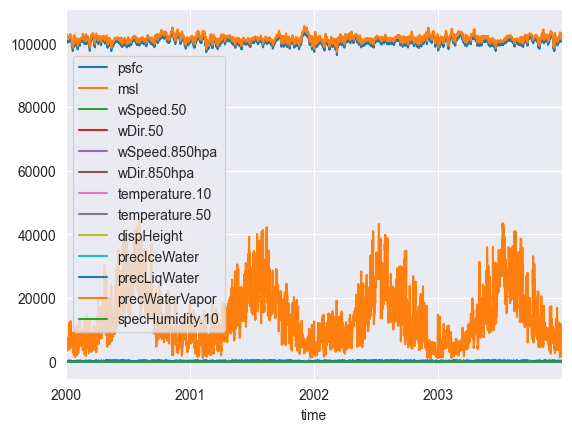

In [4]:
data.plot()

In [5]:

res = {}
for column in tqdm(data.columns):
    res[column] = tools.adfuller(data[column])

100%|██████████| 13/13 [00:26<00:00,  2.06s/it]


In [6]:
pd.options.display.float_format = '{:.5f}'.format
adf = pd.DataFrame([k,r[0],r[1],*r[4].values(), 'Да' if r[0] < r[4]['5%'] else 'Нет' ] for k,r in res.items())
adf.columns= ['Характеристика','Критерий АДФ:','P-значение:','Критические значения %1','Критические значения %5','Критические значения %10','Стационарность:']
adf.sort_values('Стационарность:')

,Характеристика,Критерий АДФ:,P-значение:,Критические значения %1,Критические значения %5,Критические значения %10,Стационарность:
0,psfc,-11.23479,0.00000,-3.43054,-2.86162,-2.56681,Да
1,msl,-11.25374,0.00000,-3.43054,-2.86162,-2.56681,Да
2,wSpeed.50,-17.17928,0.00000,-3.43054,-2.86162,-2.56681,Да
3,wDir.50,-16.73033,0.00000,-3.43054,-2.86162,-2.56681,Да
4,wSpeed.850hpa,-15.96987,0.00000,-3.43054,-2.86162,-2.56681,Да
5,wDir.850hpa,-20.35744,0.00000,-3.43054,-2.86162,-2.56681,Да
6,temperature.10,-4.80427,0.00005,-3.43054,-2.86162,-2.56681,Да
7,temperature.50,-4.76264,0.00006,-3.43054,-2.86162,-2.56681,Да
9,precIceWater,-39.78048,0.00000,-3.43054,-2.86162,-2.56681,Да
10,precLiqWater,-16.96504,0.00000,-3.43054,-2.86162,-2.56681,Да


In [7]:


lf = [tools.acf]
toolsData = pd.DataFrame(f(data[column])for column in data.columns for f in lf )
toolsData = toolsData.transpose()
toolsData.columns = [f'{re.search(r" ([a-z]+) ",str(func)).group(1)} {column}' for func in lf for column in data.columns]
toolsData

,acf psfc,acf msl,acf wSpeed.50,acf wDir.50,acf wSpeed.850hpa,acf wDir.850hpa,acf temperature.10,acf temperature.50,acf dispHeight,acf precIceWater,acf precLiqWater,acf precWaterVapor,acf specHumidity.10
0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
1,0.99919,0.99919,0.98289,0.92229,0.99042,0.92759,0.99847,0.99821,0.99943,0.92193,0.95766,0.99733,0.99793
2,0.99695,0.99692,0.94444,0.85455,0.96525,0.86366,0.99440,0.99347,0.99886,0.77750,0.87205,0.99029,0.99362
3,0.99344,0.99336,0.89834,0.79475,0.93088,0.80845,0.98846,0.98663,0.99829,0.64917,0.78246,0.98064,0.98827
4,0.98880,0.98867,0.85052,0.74403,0.89228,0.76305,0.98133,0.97845,0.99772,0.54783,0.69936,0.96971,0.98237
5,0.98319,0.98300,0.80338,0.70044,0.85263,0.72293,0.97356,0.96958,0.99715,0.46783,0.62543,0.95832,0.97621
6,0.97672,0.97645,0.75826,0.66300,0.81376,0.68952,0.96561,0.96055,0.99658,0.40498,0.56178,0.94689,0.96999
7,0.96949,0.96915,0.71588,0.63299,0.77662,0.65939,0.95789,0.95180,0.99601,0.35474,0.50777,0.93571,0.96388
8,0.96157,0.96115,0.67628,0.60562,0.74147,0.63361,0.95070,0.94368,0.99544,0.31365,0.46215,0.92494,0.95804
9,0.95303,0.95253,0.63911,0.57981,0.70810,0.60883,0.94431,0.93649,0.99488,0.27812,0.42393,0.91465,0.95259


<AxesSubplot: >

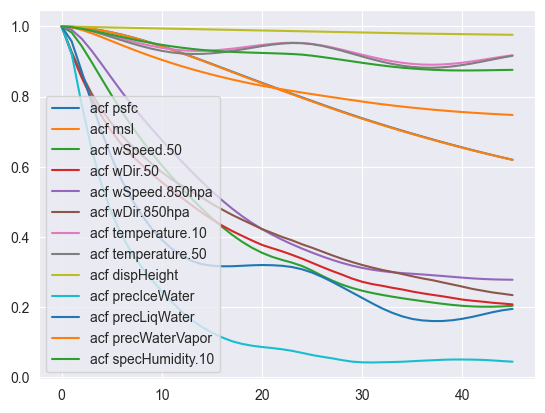

In [8]:
toolsData.plot()

49.416666666666664


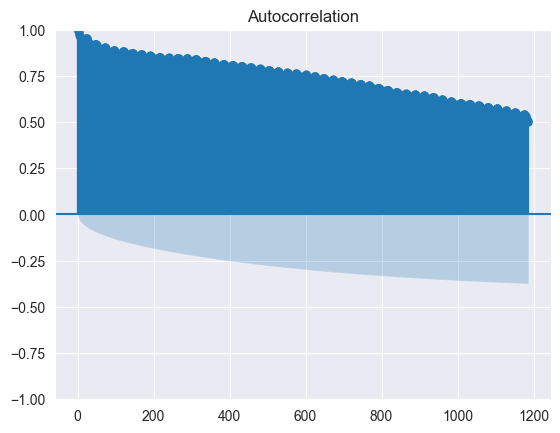

In [9]:
sm.graphics.tsa.plot_acf(data[['temperature.10']],lags=1186);
print(1186/24)

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


49.416666666666664


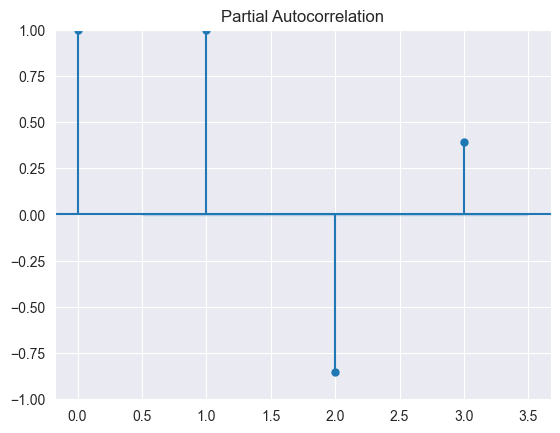

In [10]:
import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(data[['temperature.10']],lags=3);
print(1186/24)

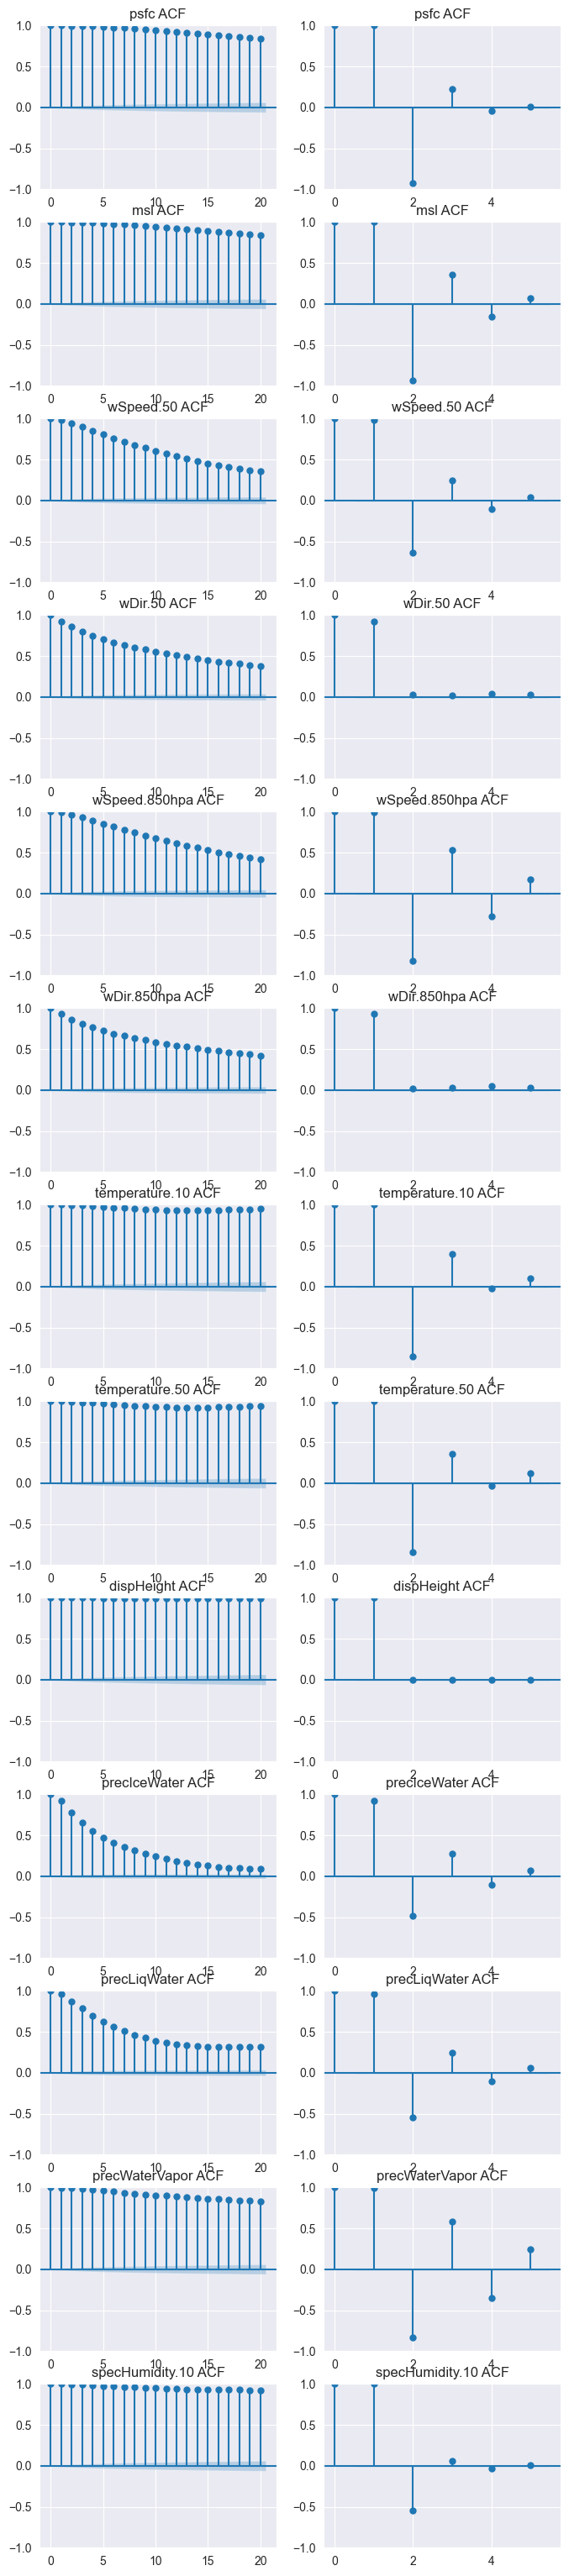

In [11]:
figs, axs = plt.subplots(data.columns.size,2,figsize=(8,3*data.columns.size))
i = 0
for column in data.columns:
    sm.graphics.tsa.plot_acf(data[column],ax=axs[i,0],title=f'{column} ACF',lags=20,)
    sm.graphics.tsa.plot_pacf(data[column],ax=axs[i,1],title=f'{column} ACF',lags=5)
    i+=1

C:\Users\admin\AppData\Local\Temp\ipykernel_10864\3965187302.py:7: UserWarning: Legend does not support handles for Figure instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  axs.legend(lines,data.columns)


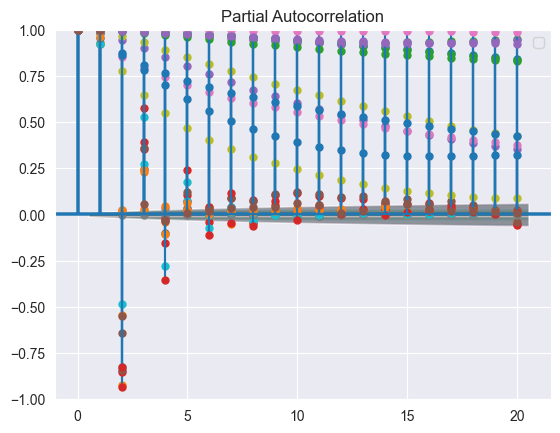

In [12]:
figs, axs = plt.subplots()
axs.legend(data.columns)
lines = []
for column in data.columns:
    lines.append(sm.graphics.tsa.plot_acf(data[column],ax=axs,lags=20,),)
    lines.append(sm.graphics.tsa.plot_pacf(data[column],ax=axs,lags=20),)
axs.legend(lines,data.columns)

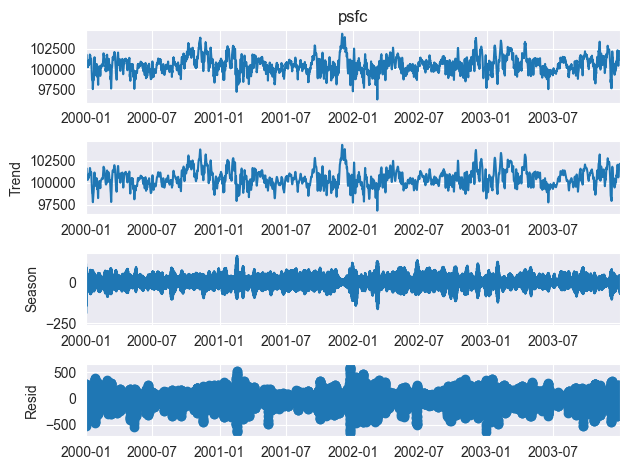

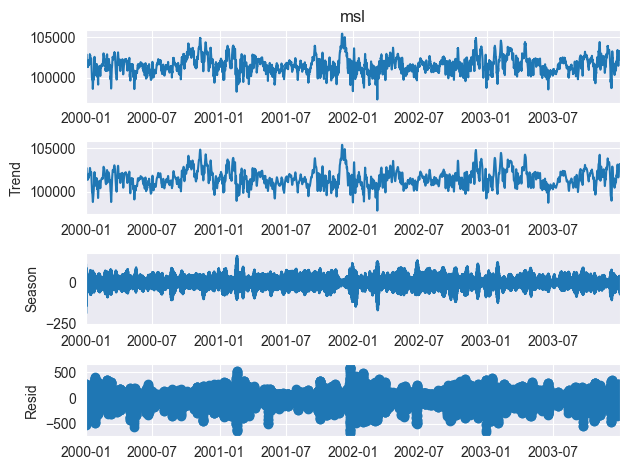

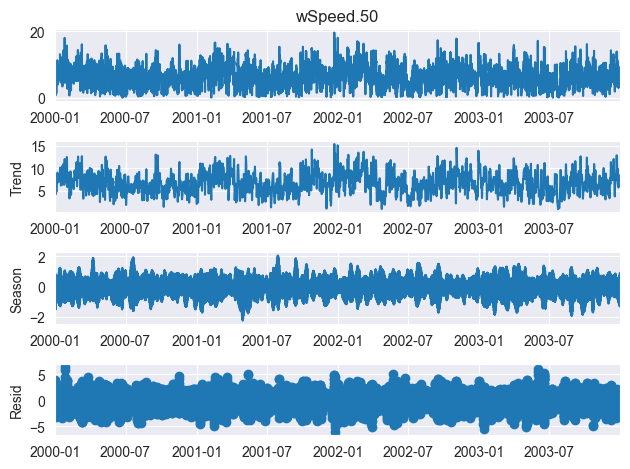

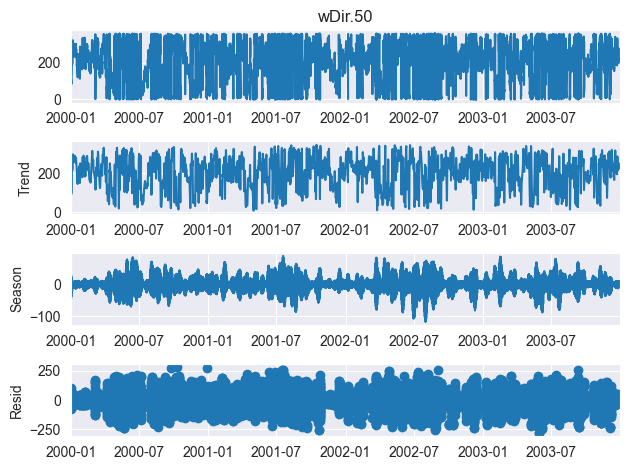

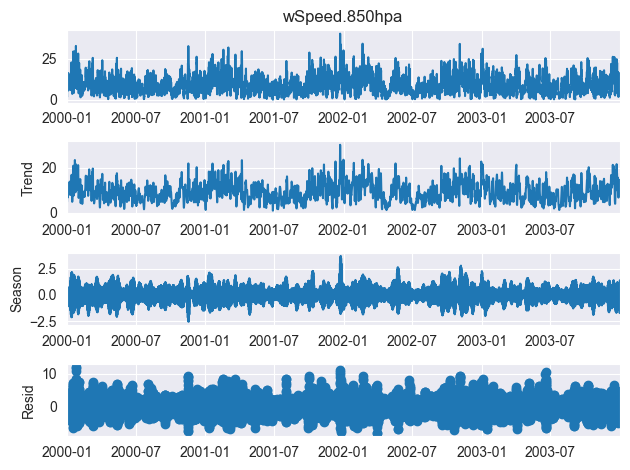

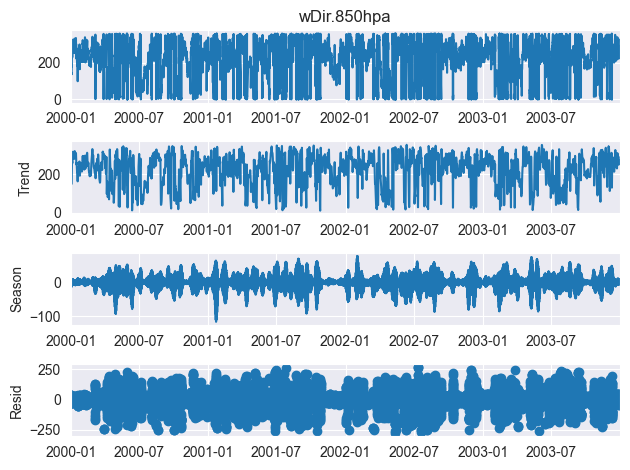

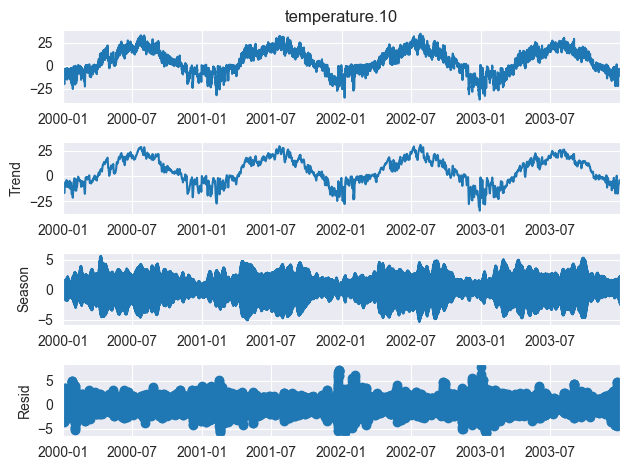

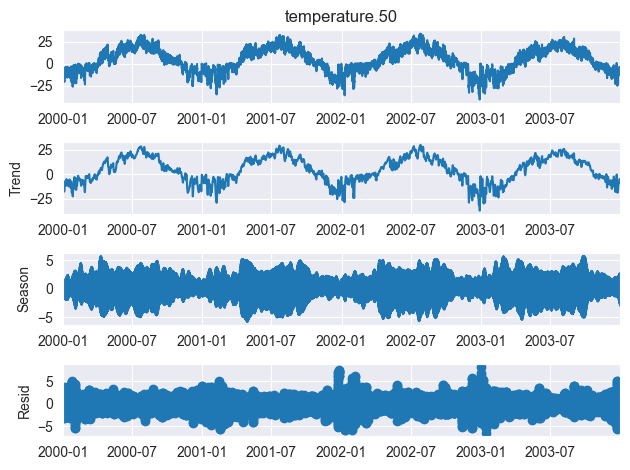

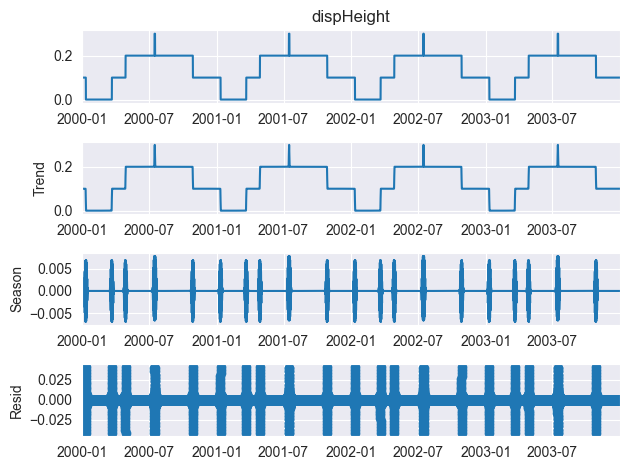

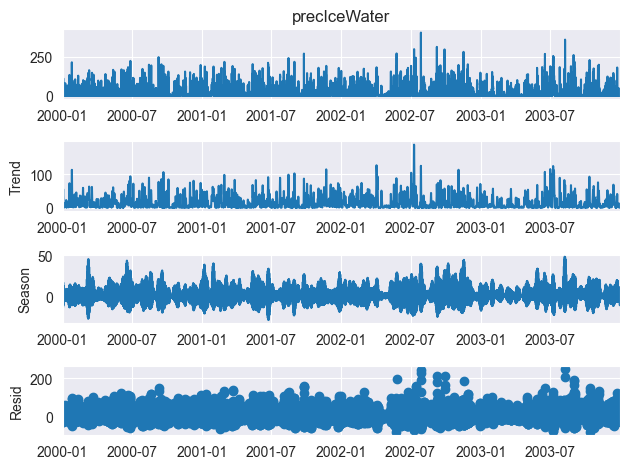

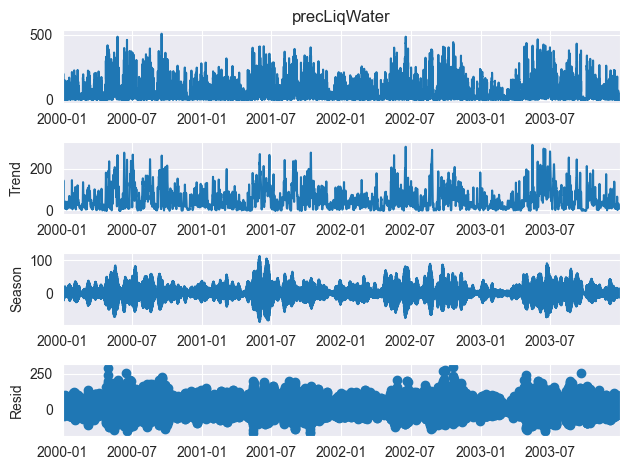

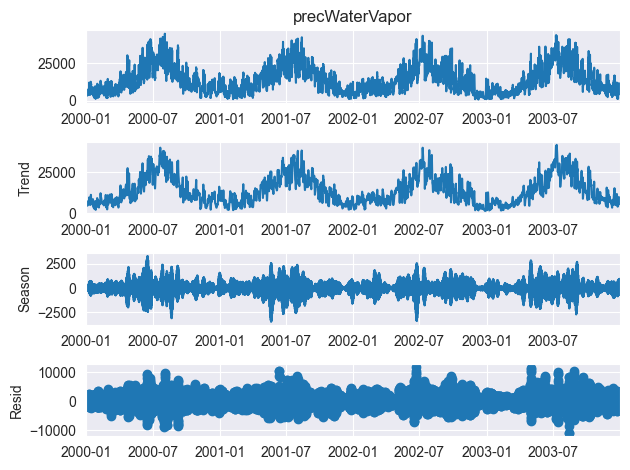

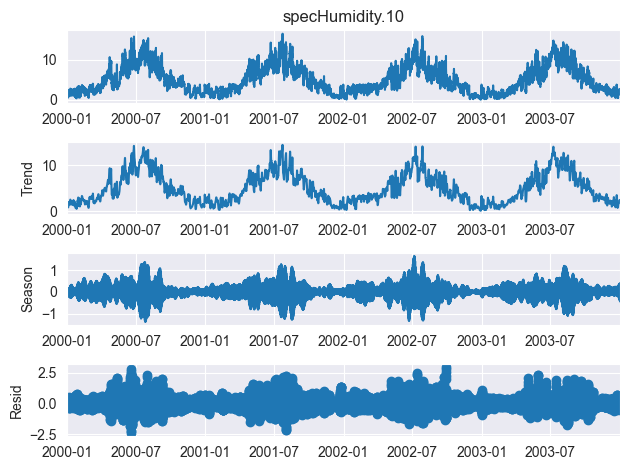

In [13]:
from statsmodels.tsa.seasonal import STL
for column in data.columns:
    stl = STL(data[column], seasonal=13)
    res = stl.fit()
    fig = res.plot()